In [1]:
!pip list

#!pip uninstall tensorflow -y
#!pip uninstall tf-nightly -y

import sys
print(sys.version)

#!pip install tf-nightly-gpu

#https://github.com/tensorflow/tensorflow/issues/37659 reason for nightly

#tensorflo was 2.6.2 downgrade to 1.5.0 via https://www.mlfairy.com/blog/2020/01/31/lstm-coreml/
#keras was  2.6.0, downgrade to 2.2.5 

#!pip uninstall tensorflow -y
#!pip uninstall keras -y

#!pip install keras==2.2.5
#!pip install tensorflow==2.2.0 #try 2.3.1


#!pip install 'h5py==2.10.0' --force-reinstall


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Package                               Version               Editable project location
------------------------------------- --------------------- -------------------------
absl-py                               0.15.0
accelerate                            0.5.1
access                                1.1.3
affine                                2.3.0
aiobotocore                           2.1.2
aiohttp                               3.8.1
aioitertools                          0.10.0
aiosignal                             1.2.0
albumentations                        1.1.0
alembic                               1.7.7
allennlp                              2.9.1
altair                                4.2.0
annoy                                 1.17.0
ansiwrap                              0.8.4
anyio                                 3.4.0
apache-beam                           2.34.0
aplus                                 0.11.0
appdirs                               1.4.4
argcomplete                    

In [2]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # ML/DL
import keras
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import tqdm
import pickle

#tf.compat.v1.enable_eager_execution()
import tensorflow_addons as tfa
#import coremltools as ct

In [3]:
df = pd.read_csv(os.path.join('../input/newencoded/encodedNew.csv'))
#df.drop(axis=1,columns=df.columns[9],inplace=True)
df.head()

d/l  pu  tpu  rpu  su  tsu  rsu  sq  tsq  rsq  bp  tbp  rbp
0    4   8   10   18  25   35   42  56   70    2  63   80    0
1    1   3   25   28   3   15   61   7   50    6   6   50   25
2    2  21   55   19  24   70   10  10   30    2  13   40   27
3    2  12   30   45  12   35    6   8   25    7  28   80    0
4    4  11   15   53  12   15    5  20   25   36  48   60   17

In [4]:
STOP_SIGN = "␣"   
allWorkoutsString = []


##NEW SHUFFLING TO FIX POOR EARLY PERFORMANCE
print(df.head())
df = df.sample(frac = 1)
print(df.head())
##NEW SHUFFLING TO FIX POOR EARLY PERFORMANCE

for i in range(len(df)):
    workout = (str(df.iloc[i]["d/l"]) + "-DL:~" + str(df.iloc[i]["pu"]) + "~" + str(df.iloc[i]["tpu"]) + "~" + str(df.iloc[i]["rpu"]) + "~" + str(df.iloc[i]["su"]) + "~" + str(df.iloc[i]["tsu"]) + "~" + str(df.iloc[i]["rsu"]) + "~" + str(df.iloc[i]["sq"]) + "~" + str(df.iloc[i]["tsq"]) + "~" + str(df.iloc[i]["rsq"]) + "~"  +  str(df.iloc[i]["bp"]) + "~" + str(df.iloc[i]["tbp"]) + "~" + str(df.iloc[i]["rbp"]) + "~" + "␣" )
    allWorkoutsString.append(workout)
    
for j in range(15):
    print(allWorkoutsString[j])




   d/l  pu  tpu  rpu  su  tsu  rsu  sq  tsq  rsq  bp  tbp  rbp
0    4   8   10   18  25   35   42  56   70    2  63   80    0
1    1   3   25   28   3   15   61   7   50    6   6   50   25
2    2  21   55   19  24   70   10  10   30    2  13   40   27
3    2  12   30   45  12   35    6   8   25    7  28   80    0
4    4  11   15   53  12   15    5  20   25   36  48   60   17
     d/l  pu  tpu  rpu  su  tsu  rsu  sq  tsq  rsq  bp  tbp  rbp
299    4  29   40   18  54   75    0  64   80    0  42   55   13
225    1   4   35   24  12   70    7  16   80    0  11   55    7
834    3  14   25    4  24   45   24  15   25   23  21   35   44
681    2  27   70    8  23   65   15  30   75    1   9   25   55
813    3  41   70    6  36   65    2   6   10   15  16   30    5
4-DL:~29~40~18~54~75~0~64~80~0~42~55~13~␣
1-DL:~4~35~24~12~70~7~16~80~0~11~55~7~␣
3-DL:~14~25~4~24~45~24~15~25~23~21~35~44~␣
2-DL:~27~70~8~23~65~15~30~75~1~9~25~55~␣
3-DL:~41~70~6~36~65~2~6~10~15~16~30~5~␣
4-DL:~54~70~10~19~25~44~23

In [5]:
def decodeWorkout(input):    
    c = input.split("~")
    if(len(c) == 5):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        outputStr = (pushupStr)
    elif(len(c) == 8):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        situpStr = str("\n" + c[4] + " situps for " + c[5] + " seconds with " + c[6] + " second rest ")
        outputStr = (pushupStr + situpStr)
    elif(len(c)==11):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        situpStr = str("\n" + c[4] + " situps for " + c[5] + " seconds with " + c[6] + " second rest ")
        squatStr = str("\n" + c[7] + " squats for " + c[8] + " seconds with " + c[9] + " second rest ")
        outputStr = (pushupStr + situpStr + squatStr)
    elif(len(c) == 14):
        pushupStr = str(c[0] + "\n" + c[1] + " pushups for " + c[2] + " seconds with " + c[3] + " second rest ")
        situpStr = str("\n" + c[4] + " situps for " + c[5] + " seconds with " + c[6] + " second rest ")
        squatStr = str("\n" + c[7] + " squats for " + c[8] + " seconds with " + c[9] + " second rest ")
        burpeeStr = str("\n" + c[10] + " burpees for " + c[11] + " seconds with " + c[12] + " second rest ")
        outputStr = (pushupStr + situpStr + squatStr + burpeeStr)
    else:
        outputStr = "fail"
    
    return outputStr
for i in range(15) :
        print(decodeWorkout(allWorkoutsString[i]))


4-DL:
29 pushups for 40 seconds with 18 second rest 
54 situps for 75 seconds with 0 second rest 
64 squats for 80 seconds with 0 second rest 
42 burpees for 55 seconds with 13 second rest 
1-DL:
4 pushups for 35 seconds with 24 second rest 
12 situps for 70 seconds with 7 second rest 
16 squats for 80 seconds with 0 second rest 
11 burpees for 55 seconds with 7 second rest 
3-DL:
14 pushups for 25 seconds with 4 second rest 
24 situps for 45 seconds with 24 second rest 
15 squats for 25 seconds with 23 second rest 
21 burpees for 35 seconds with 44 second rest 
2-DL:
27 pushups for 70 seconds with 8 second rest 
23 situps for 65 seconds with 15 second rest 
30 squats for 75 seconds with 1 second rest 
9 burpees for 25 seconds with 55 second rest 
3-DL:
41 pushups for 70 seconds with 6 second rest 
36 situps for 65 seconds with 2 second rest 
6 squats for 10 seconds with 15 second rest 
16 burpees for 30 seconds with 5 second rest 
4-DL:
54 pushups for 70 seconds with 10 second rest 
1

In [6]:
#encoding each of the characters into integers so the model can understand -> paying special attention to the stop_sign
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    char_level=True, #could attempt to make this non-char level
    filters='',
    lower=False,
    split=''
)
# Stop word is not a part of workouts, but tokenizer must know about it as well.
#tokenizer.fit_on_texts([STOP_SIGN]) #come back
tokenizer.fit_on_texts(allWorkoutsString)
tokenizer.get_config()

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [7]:
VOCABULARY_SIZE = len(tokenizer.word_counts) + 1 #idk why its +1
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  17


In [8]:
dataset_vectorized = tokenizer.texts_to_sequences(allWorkoutsString)
print('Vectorized dataset size', len(dataset_vectorized))


Vectorized dataset size 1500


In [9]:
def decodeVector(vector):
    decodedWorkout = tokenizer.sequences_to_texts([vector])[0]
    print(decodedWorkout)
    
#basic test to see if the decoder is working
decodeVector(dataset_vectorized[0])

4 - D L : ~ 2 9 ~ 4 0 ~ 1 8 ~ 5 4 ~ 7 5 ~ 0 ~ 6 4 ~ 8 0 ~ 0 ~ 4 2 ~ 5 5 ~ 1 3 ~ ␣


In [10]:
#add padding to ensure same length --- only if all are not the sane length
print(len(dataset_vectorized))
maxLength = 0
for workout_index, workout in enumerate(dataset_vectorized[:len(dataset_vectorized)]):
    #if(len(workout)) != 167:
    if(maxLength < len(workout)):
        #print('Workout #{} length: {}'.format(workout_index + 1, len(workout)))
        maxLength = len(workout)
#padding is required
print(maxLength)

1500
43


In [11]:
dataset_vectorized_padded_without_stops = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized,
    padding='post',
    truncating='post',
    # We use -1 here and +1 in the next step to make sure
    # that all recipes will have at least 1 stops sign at the end,
    # since each sequence will be shifted and truncated afterwards
    # (to generate X and Y sequences).
    maxlen=maxLength-1,
    #value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)
dataset_vectorized_padded = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized_padded_without_stops,
    padding='post',
    truncating='post',
    maxlen=maxLength+1,
    #value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

for workout_index, workout in enumerate(dataset_vectorized_padded[:len(dataset_vectorized_padded)]):
    if(len(workout)) != maxLength+1:
        print('Workout #{} length: {}'.format(workout_index + 1, len(workout)))

#test it out
decodeVector(dataset_vectorized_padded[0])

4 - D L : ~ 2 9 ~ 4 0 ~ 1 8 ~ 5 4 ~ 7 5 ~ 0 ~ 6 4 ~ 8 0 ~ 0 ~ 4 2 ~ 5 5 ~ 1 3 ~ ␣


In [12]:
#converting to tensors
dataset = tf.data.Dataset.from_tensor_slices(dataset_vectorized_padded)

#confirming the concept
#for workout in dataset.take(1):
#    print('Raw workout:\n', workout.numpy(), '\n\n\n')
#    print('Stringified workout:\n')
#    decodeVector(workout.numpy())
#doesnt work with my downgraded tensorflow and keras

2022-04-23 20:41:55.555414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 20:41:55.669486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 20:41:55.670604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-23 20:41:55.673744: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [13]:
#split processing
def split_input_target(workout):
    input_text = workout[:-1]
    target_text = workout[1:]
    
    return input_text, target_text
dataset_targeted = dataset.map(split_input_target)
print(dataset_targeted)

<MapDataset shapes: ((43,), (43,)), types: (tf.int32, tf.int32)>


In [14]:
#??

#downgraded tensorflow and keras prevents this from working


#for input_example, target_example in dataset_targeted.take(1):
#    print('Input sequence size:', repr(len(input_example.numpy())))
#    print('Target sequence size:', repr(len(target_example.numpy())))
#    print()
#    
#    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:50]])[0]
#    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:50]])[0]
#    
#    print('Input:  ', repr(''.join(input_stringified)))
#    print('Target: ', repr(''.join(target_stringified)))
#
#
#for i, (input_idx, target_idx) in enumerate(zip(input_example[:10], target_example[:10])):
#    print('Step {:2d}'.format(i + 1))
#    print('  input: {} ({:s})'.format(input_idx, repr(tokenizer.sequences_to_texts([[input_idx.numpy()]])[0])))
#    print('  expected output: {} ({:s})'.format(target_idx, repr(tokenizer.sequences_to_texts([[target_idx.numpy()]])[0])))

In [15]:
print(dataset_targeted)

total_workouts_num = len(df)
print('total_workouts_num : ', total_workouts_num)
print('maxLength: ', maxLength)
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

<MapDataset shapes: ((43,), (43,)), types: (tf.int32, tf.int32)>
total_workouts_num :  1500
maxLength:  43
VOCABULARY_SIZE:  17


In [16]:
# Batch size.
BATCH_SIZE = 64 
# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
SHUFFLE_BUFFER_SIZE = 1000
dataset_train = dataset_targeted \
  .shuffle(SHUFFLE_BUFFER_SIZE) \
  .batch(BATCH_SIZE, drop_remainder=True) \
  .repeat()
print(dataset_train)

<RepeatDataset shapes: ((64, 43), (64, 43)), types: (tf.int32, tf.int32)>


In [17]:
#embedding layer
tmp_vocab_size = 10
tmp_embedding_size = 5
tmp_input_length = 8
tmp_batch_size = 2
tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embedding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length) #come back
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)
print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

tmp_input_array shape: (2, 8)
tmp_input_array:
[[2 3 2 4 9 3 0 1]
 [7 6 3 1 6 4 3 1]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[-0.02095193  0.0149      0.04553953 -0.02387832 -0.00489635]
  [-0.03103199 -0.04364773  0.00100826 -0.04421647  0.0278631 ]
  [-0.02095193  0.0149      0.04553953 -0.02387832 -0.00489635]
  [ 0.01243011  0.04873155 -0.00138069 -0.00917826  0.03538332]
  [ 0.02402145 -0.04737571  0.01990343  0.00858044  0.03941759]
  [-0.03103199 -0.04364773  0.00100826 -0.04421647  0.0278631 ]
  [-0.00910089 -0.04337115  0.02956492 -0.03781484 -0.0382465 ]
  [-0.02317224  0.028632    0.01969141  0.0426216   0.00455766]]

 [[-0.01572951  0.0445221  -0.02131991 -0.01328772  0.01943493]
  [ 0.03193027 -0.03682469  0.01354622  0.03608059 -0.04165392]
  [-0.03103199 -0.04364773  0.00100826 -0.04421647  0.0278631 ]
  [-0.02317224  0.028632    0.01969141  0.0426216   0.00455766]
  [ 0.03193027 -0.03682469  0.01354622  0.03608059 -0.04165392]
  [ 0.01243011  0.04873155 

2022-04-23 20:41:59.037229: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [18]:
#LSTM model -> review

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        batch_input_shape=[batch_size, None]
    ))
    model.add(tf.keras.layers.LSTM(
        units=rnn_units,
        return_sequences=True,
        stateful=True, #look into this causing the issue potentially, originally was True
        recurrent_initializer=tf.keras.initializers.GlorotNormal() #used to be be tf.keras.initializers.GlorotNormal() before downgradingf
    )) # temp removed
    model.add(tf.keras.layers.Dense(vocab_size))
    
    return model
model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=BATCH_SIZE
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (64, None, 256)           4352      
_________________________________________________________________
lstm (LSTM)                  (64, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (64, None, 17)            17425     
Total params: 5,268,753
Trainable params: 5,268,753
Non-trainable params: 0
_________________________________________________________________


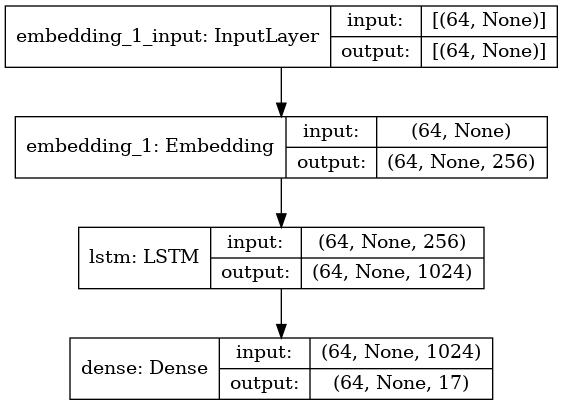

In [19]:
#plotting the model itself
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    to_file='model.png'
)

In [20]:
#opt, loss funct. 
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )
    
    return entropy
#compile

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #used to be 0.001 which worked much better
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='loss',
    restore_best_weights=True,
    verbose=1
)

In [21]:
# Create a checkpoints directory. TO SAVE AND CONTINUE TRAINING
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_') #used to be ckpt_{epoch}, got rid due to space issues on kaggle
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [22]:
#const
EPOCHS = 400 #1.3k seemed to work well
INITIAL_EPOCH = 1
STEPS_PER_EPOCH = int(len(df)/BATCH_SIZE)
print('EPOCHS:          ', EPOCHS) 
print('INITIAL_EPOCH:   ', INITIAL_EPOCH)
print('STEPS_PER_EPOCH: ', STEPS_PER_EPOCH) #default was 1500

EPOCHS:           400
INITIAL_EPOCH:    1
STEPS_PER_EPOCH:  23


In [23]:
history = model.fit(
    x=dataset_train,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=INITIAL_EPOCH,
    callbacks=[
        checkpoint_callback,
        tqdm_callback
       # early_stopping_callback #we want to overfit this so get rid of early stopping
    ]
)
# Saving the trained model to file (to be able to re-use it later).
model_name = 'LSTM_WORKOUT_GEN_0.1_raw.h5'
#model.save(model_name, save_format='h5')
#model.save(f"{model_name}~AFTERTRAIN")

Training:   0%|           0/400 ETA: ?s,  ?epochs/s

Epoch 2/400
Epoch 2/400


0/23           ETA: ?s - 

2022-04-23 20:42:03.944048: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - 5s 26ms/step - loss: 2.5923
Epoch 3/400
Epoch 3/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 1.9010
Epoch 4/400
Epoch 4/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 1.3584
Epoch 5/400
Epoch 5/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 1.1991
Epoch 6/400
Epoch 6/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 1.0603
Epoch 7/400
Epoch 7/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.9955
Epoch 8/400
Epoch 8/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.9524
Epoch 9/400
Epoch 9/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.9387
Epoch 10/400
Epoch 10/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.9207
Epoch 11/400
Epoch 11/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.8937
Epoch 12/400
Epoch 12/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 1.1156
Epoch 13/400
Epoch 13/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 1.1030
Epoch 14/400
Epoch 14/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 1.0124
Epoch 15/400
Epoch 15/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.9394
Epoch 16/400
Epoch 16/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.9060
Epoch 17/400
Epoch 17/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.8808
Epoch 18/400
Epoch 18/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.8634
Epoch 19/400
Epoch 19/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.8459
Epoch 20/400
Epoch 20/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.8998
Epoch 21/400
Epoch 21/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.8521
Epoch 22/400
Epoch 22/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.8074
Epoch 23/400
Epoch 23/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.7981
Epoch 24/400
Epoch 24/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7939
Epoch 25/400
Epoch 25/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7722
Epoch 26/400
Epoch 26/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.7676
Epoch 27/400
Epoch 27/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.7595
Epoch 28/400
Epoch 28/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7503
Epoch 29/400
Epoch 29/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7410
Epoch 30/400
Epoch 30/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7340
Epoch 31/400
Epoch 31/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.7329
Epoch 32/400
Epoch 32/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.7301
Epoch 33/400
Epoch 33/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7291
Epoch 34/400
Epoch 34/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7200
Epoch 35/400
Epoch 35/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.7094
Epoch 36/400
Epoch 36/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.7044
Epoch 37/400
Epoch 37/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.7018
Epoch 38/400
Epoch 38/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6978
Epoch 39/400
Epoch 39/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6976
Epoch 40/400
Epoch 40/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.6924
Epoch 41/400
Epoch 41/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6872
Epoch 42/400
Epoch 42/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6832
Epoch 43/400
Epoch 43/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.6778
Epoch 44/400
Epoch 44/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.6733
Epoch 45/400
Epoch 45/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6686
Epoch 46/400
Epoch 46/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6705
Epoch 47/400
Epoch 47/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.6683
Epoch 48/400
Epoch 48/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6619
Epoch 49/400
Epoch 49/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6551
Epoch 50/400
Epoch 50/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6490
Epoch 51/400
Epoch 51/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6421
Epoch 52/400
Epoch 52/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6379
Epoch 53/400
Epoch 53/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6335
Epoch 54/400
Epoch 54/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6239
Epoch 55/400
Epoch 55/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6161
Epoch 56/400
Epoch 56/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.6046
Epoch 57/400
Epoch 57/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5988
Epoch 58/400
Epoch 58/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5876
Epoch 59/400
Epoch 59/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.5747
Epoch 60/400
Epoch 60/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5611
Epoch 61/400
Epoch 61/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5507
Epoch 62/400
Epoch 62/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5363
Epoch 63/400
Epoch 63/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.5234
Epoch 64/400
Epoch 64/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.5072
Epoch 65/400
Epoch 65/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4863
Epoch 66/400
Epoch 66/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4677
Epoch 67/400
Epoch 67/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.4456
Epoch 68/400
Epoch 68/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4257
Epoch 69/400
Epoch 69/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4012
Epoch 70/400
Epoch 70/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.3871
Epoch 71/400
Epoch 71/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.3615
Epoch 72/400
Epoch 72/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.3352
Epoch 73/400
Epoch 73/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.3134
Epoch 74/400
Epoch 74/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.2942
Epoch 75/400
Epoch 75/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2743
Epoch 76/400
Epoch 76/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.2595
Epoch 77/400
Epoch 77/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.2460
Epoch 78/400
Epoch 78/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4225
Epoch 79/400
Epoch 79/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.5319
Epoch 80/400
Epoch 80/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.3377
Epoch 81/400
Epoch 81/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2557
Epoch 82/400
Epoch 82/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2227
Epoch 83/400
Epoch 83/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.2061
Epoch 84/400
Epoch 84/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1951
Epoch 85/400
Epoch 85/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1894
Epoch 86/400
Epoch 86/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1845
Epoch 87/400
Epoch 87/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1810
Epoch 88/400
Epoch 88/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1779
Epoch 89/400
Epoch 89/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1757
Epoch 90/400
Epoch 90/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1729
Epoch 91/400
Epoch 91/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1722
Epoch 92/400
Epoch 92/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1702
Epoch 93/400
Epoch 93/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1686
Epoch 94/400
Epoch 94/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1661
Epoch 95/400
Epoch 95/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1654
Epoch 96/400
Epoch 96/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1639
Epoch 97/400
Epoch 97/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1630
Epoch 98/400
Epoch 98/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1634
Epoch 99/400
Epoch 99/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1619
Epoch 100/400
Epoch 100/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1609
Epoch 101/400
Epoch 101/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1606
Epoch 102/400
Epoch 102/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1602
Epoch 103/400
Epoch 103/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1591
Epoch 104/400
Epoch 104/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1573
Epoch 105/400
Epoch 105/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1579
Epoch 106/400
Epoch 106/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1584
Epoch 107/400
Epoch 107/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1566
Epoch 108/400
Epoch 108/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1566
Epoch 109/400
Epoch 109/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1553
Epoch 110/400
Epoch 110/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1548
Epoch 111/400
Epoch 111/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1547
Epoch 112/400
Epoch 112/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1538
Epoch 113/400
Epoch 113/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1539
Epoch 114/400
Epoch 114/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1541
Epoch 115/400
Epoch 115/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1535
Epoch 116/400
Epoch 116/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1532
Epoch 117/400
Epoch 117/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1532
Epoch 118/400
Epoch 118/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1530
Epoch 119/400
Epoch 119/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1522
Epoch 120/400
Epoch 120/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1533
Epoch 121/400
Epoch 121/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1518
Epoch 122/400
Epoch 122/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1516
Epoch 123/400
Epoch 123/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1515
Epoch 124/400
Epoch 124/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1522
Epoch 125/400
Epoch 125/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1518
Epoch 126/400
Epoch 126/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1515
Epoch 127/400
Epoch 127/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1518
Epoch 128/400
Epoch 128/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1517
Epoch 129/400
Epoch 129/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1505
Epoch 130/400
Epoch 130/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1502
Epoch 131/400
Epoch 131/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1506
Epoch 132/400
Epoch 132/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1510
Epoch 133/400
Epoch 133/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 32ms/step - loss: 0.1505
Epoch 134/400
Epoch 134/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1499
Epoch 135/400
Epoch 135/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1492
Epoch 136/400
Epoch 136/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1496
Epoch 137/400
Epoch 137/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1496
Epoch 138/400
Epoch 138/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1495
Epoch 139/400
Epoch 139/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1495
Epoch 140/400
Epoch 140/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1492
Epoch 141/400
Epoch 141/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1488
Epoch 142/400
Epoch 142/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1485
Epoch 143/400
Epoch 143/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1485
Epoch 144/400
Epoch 144/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1487
Epoch 145/400
Epoch 145/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1494
Epoch 146/400
Epoch 146/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1483
Epoch 147/400
Epoch 147/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1484
Epoch 148/400
Epoch 148/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1484
Epoch 149/400
Epoch 149/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1482
Epoch 150/400
Epoch 150/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1482
Epoch 151/400
Epoch 151/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1484
Epoch 152/400
Epoch 152/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1477
Epoch 153/400
Epoch 153/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1477
Epoch 154/400
Epoch 154/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1484
Epoch 155/400
Epoch 155/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1474
Epoch 156/400
Epoch 156/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1479
Epoch 157/400
Epoch 157/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1474
Epoch 158/400
Epoch 158/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1478
Epoch 159/400
Epoch 159/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1470
Epoch 160/400
Epoch 160/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1474
Epoch 161/400
Epoch 161/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1491
Epoch 162/400
Epoch 162/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1606
Epoch 163/400
Epoch 163/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2235
Epoch 164/400
Epoch 164/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.2626
Epoch 165/400
Epoch 165/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2256
Epoch 166/400
Epoch 166/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1845
Epoch 167/400
Epoch 167/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1641
Epoch 168/400
Epoch 168/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1545
Epoch 169/400
Epoch 169/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1509
Epoch 170/400
Epoch 170/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1491
Epoch 171/400
Epoch 171/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1485
Epoch 172/400
Epoch 172/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1475
Epoch 173/400
Epoch 173/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1470
Epoch 174/400
Epoch 174/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1467
Epoch 175/400
Epoch 175/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1466
Epoch 176/400
Epoch 176/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1466
Epoch 177/400
Epoch 177/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1467
Epoch 178/400
Epoch 178/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1462
Epoch 179/400
Epoch 179/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1466
Epoch 180/400
Epoch 180/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1466
Epoch 181/400
Epoch 181/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1458
Epoch 182/400
Epoch 182/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1462
Epoch 183/400
Epoch 183/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1457
Epoch 184/400
Epoch 184/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1465
Epoch 185/400
Epoch 185/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1465
Epoch 186/400
Epoch 186/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1456
Epoch 187/400
Epoch 187/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1453
Epoch 188/400
Epoch 188/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1453
Epoch 189/400
Epoch 189/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1450
Epoch 190/400
Epoch 190/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1453
Epoch 191/400
Epoch 191/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1451
Epoch 192/400
Epoch 192/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1449
Epoch 193/400
Epoch 193/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1447
Epoch 194/400
Epoch 194/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1445
Epoch 195/400
Epoch 195/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1449
Epoch 196/400
Epoch 196/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1447
Epoch 197/400
Epoch 197/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1447
Epoch 198/400
Epoch 198/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1445
Epoch 199/400
Epoch 199/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1441
Epoch 200/400
Epoch 200/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1447
Epoch 201/400
Epoch 201/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1447
Epoch 202/400
Epoch 202/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1448
Epoch 203/400
Epoch 203/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1446
Epoch 204/400
Epoch 204/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1444
Epoch 205/400
Epoch 205/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1446
Epoch 206/400
Epoch 206/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1443
Epoch 207/400
Epoch 207/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1439
Epoch 208/400
Epoch 208/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1435
Epoch 209/400
Epoch 209/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1440
Epoch 210/400
Epoch 210/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1440
Epoch 211/400
Epoch 211/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1441
Epoch 212/400
Epoch 212/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1444
Epoch 213/400
Epoch 213/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1439
Epoch 214/400
Epoch 214/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1437
Epoch 215/400
Epoch 215/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1442
Epoch 216/400
Epoch 216/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1437
Epoch 217/400
Epoch 217/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1439
Epoch 218/400
Epoch 218/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1435
Epoch 219/400
Epoch 219/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1439
Epoch 220/400
Epoch 220/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1436
Epoch 221/400
Epoch 221/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1440
Epoch 222/400
Epoch 222/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1437
Epoch 223/400
Epoch 223/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1434
Epoch 224/400
Epoch 224/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1432
Epoch 225/400
Epoch 225/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1432
Epoch 226/400
Epoch 226/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1436
Epoch 227/400
Epoch 227/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1438
Epoch 228/400
Epoch 228/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1433
Epoch 229/400
Epoch 229/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1436
Epoch 230/400
Epoch 230/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1439
Epoch 231/400
Epoch 231/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1429
Epoch 232/400
Epoch 232/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1434
Epoch 233/400
Epoch 233/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1430
Epoch 234/400
Epoch 234/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1428
Epoch 235/400
Epoch 235/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1432
Epoch 236/400
Epoch 236/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1431
Epoch 237/400
Epoch 237/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 32ms/step - loss: 0.1437
Epoch 238/400
Epoch 238/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1437
Epoch 239/400
Epoch 239/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1431
Epoch 240/400
Epoch 240/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1435
Epoch 241/400
Epoch 241/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1430
Epoch 242/400
Epoch 242/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1432
Epoch 243/400
Epoch 243/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1434
Epoch 244/400
Epoch 244/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1434
Epoch 245/400
Epoch 245/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1429
Epoch 246/400
Epoch 246/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1425
Epoch 247/400
Epoch 247/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1428
Epoch 248/400
Epoch 248/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1431
Epoch 249/400
Epoch 249/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1427
Epoch 250/400
Epoch 250/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1426
Epoch 251/400
Epoch 251/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1423
Epoch 252/400
Epoch 252/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1424
Epoch 253/400
Epoch 253/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1428
Epoch 254/400
Epoch 254/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 255/400
Epoch 255/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1433
Epoch 256/400
Epoch 256/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1429
Epoch 257/400
Epoch 257/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1430
Epoch 258/400
Epoch 258/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1428
Epoch 259/400
Epoch 259/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1427
Epoch 260/400
Epoch 260/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1426
Epoch 261/400
Epoch 261/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1424
Epoch 262/400
Epoch 262/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 263/400
Epoch 263/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 264/400
Epoch 264/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 265/400
Epoch 265/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1422
Epoch 266/400
Epoch 266/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 267/400
Epoch 267/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 268/400
Epoch 268/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1428
Epoch 269/400
Epoch 269/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1425
Epoch 270/400
Epoch 270/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1431
Epoch 271/400
Epoch 271/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1425
Epoch 272/400
Epoch 272/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1417
Epoch 273/400
Epoch 273/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1419
Epoch 274/400
Epoch 274/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 33ms/step - loss: 0.1421
Epoch 275/400
Epoch 275/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1419
Epoch 276/400
Epoch 276/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1420
Epoch 277/400
Epoch 277/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1421
Epoch 278/400
Epoch 278/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1417
Epoch 279/400
Epoch 279/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1421
Epoch 280/400
Epoch 280/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1419
Epoch 281/400
Epoch 281/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1419
Epoch 282/400
Epoch 282/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1417
Epoch 283/400
Epoch 283/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1415
Epoch 284/400
Epoch 284/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1417
Epoch 285/400
Epoch 285/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1420
Epoch 286/400
Epoch 286/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1418
Epoch 287/400
Epoch 287/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1416
Epoch 288/400
Epoch 288/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1415
Epoch 289/400
Epoch 289/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1415
Epoch 290/400
Epoch 290/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1417
Epoch 291/400
Epoch 291/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1417
Epoch 292/400
Epoch 292/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1416
Epoch 293/400
Epoch 293/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1414
Epoch 294/400
Epoch 294/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1416
Epoch 295/400
Epoch 295/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1416
Epoch 296/400
Epoch 296/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1413
Epoch 297/400
Epoch 297/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1415
Epoch 298/400
Epoch 298/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1414
Epoch 299/400
Epoch 299/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1413
Epoch 300/400
Epoch 300/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1414
Epoch 301/400
Epoch 301/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1415
Epoch 302/400
Epoch 302/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1411
Epoch 303/400
Epoch 303/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1412
Epoch 304/400
Epoch 304/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1412
Epoch 305/400
Epoch 305/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1415
Epoch 306/400
Epoch 306/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1414
Epoch 307/400
Epoch 307/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1415
Epoch 308/400
Epoch 308/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1412
Epoch 309/400
Epoch 309/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 34ms/step - loss: 0.1411
Epoch 310/400
Epoch 310/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1409
Epoch 311/400
Epoch 311/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1410
Epoch 312/400
Epoch 312/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1410
Epoch 313/400
Epoch 313/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1410
Epoch 314/400
Epoch 314/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1411
Epoch 315/400
Epoch 315/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1410
Epoch 316/400
Epoch 316/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1407
Epoch 317/400
Epoch 317/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1414
Epoch 318/400
Epoch 318/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1410
Epoch 319/400
Epoch 319/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1409
Epoch 320/400
Epoch 320/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1408
Epoch 321/400
Epoch 321/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1412
Epoch 322/400
Epoch 322/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1406
Epoch 323/400
Epoch 323/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1410
Epoch 324/400
Epoch 324/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1404
Epoch 325/400
Epoch 325/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1407
Epoch 326/400
Epoch 326/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1402
Epoch 327/400
Epoch 327/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1408
Epoch 328/400
Epoch 328/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1407
Epoch 329/400
Epoch 329/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1406
Epoch 330/400
Epoch 330/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1403
Epoch 331/400
Epoch 331/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1402
Epoch 332/400
Epoch 332/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1404
Epoch 333/400
Epoch 333/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1409
Epoch 334/400
Epoch 334/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1405
Epoch 335/400
Epoch 335/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1406
Epoch 336/400
Epoch 336/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1405
Epoch 337/400
Epoch 337/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1402
Epoch 338/400
Epoch 338/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1404
Epoch 339/400
Epoch 339/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1406
Epoch 340/400
Epoch 340/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1402
Epoch 341/400
Epoch 341/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1401
Epoch 342/400
Epoch 342/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1401
Epoch 343/400
Epoch 343/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1402
Epoch 344/400
Epoch 344/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1404
Epoch 345/400
Epoch 345/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1401
Epoch 346/400
Epoch 346/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1401
Epoch 347/400
Epoch 347/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1401
Epoch 348/400
Epoch 348/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1404
Epoch 349/400
Epoch 349/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1401
Epoch 350/400
Epoch 350/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1402
Epoch 351/400
Epoch 351/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1397
Epoch 352/400
Epoch 352/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1400
Epoch 353/400
Epoch 353/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.2891
Epoch 354/400
Epoch 354/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.4740
Epoch 355/400
Epoch 355/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.3211
Epoch 356/400
Epoch 356/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.2239
Epoch 357/400
Epoch 357/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1767
Epoch 358/400
Epoch 358/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1563
Epoch 359/400
Epoch 359/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1483
Epoch 360/400
Epoch 360/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1449
Epoch 361/400
Epoch 361/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1435
Epoch 362/400
Epoch 362/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1428
Epoch 363/400
Epoch 363/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1423
Epoch 364/400
Epoch 364/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1418
Epoch 365/400
Epoch 365/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1419
Epoch 366/400
Epoch 366/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1411
Epoch 367/400
Epoch 367/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1411
Epoch 368/400
Epoch 368/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1412
Epoch 369/400
Epoch 369/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1409
Epoch 370/400
Epoch 370/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1410
Epoch 371/400
Epoch 371/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 31ms/step - loss: 0.1409
Epoch 372/400
Epoch 372/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 29ms/step - loss: 0.1407
Epoch 373/400
Epoch 373/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1405
Epoch 374/400
Epoch 374/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1402
Epoch 375/400
Epoch 375/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1402
Epoch 376/400
Epoch 376/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1400
Epoch 377/400
Epoch 377/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1399
Epoch 378/400
Epoch 378/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1398
Epoch 379/400
Epoch 379/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1395
Epoch 380/400
Epoch 380/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1396
Epoch 381/400
Epoch 381/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1398
Epoch 382/400
Epoch 382/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1400
Epoch 383/400
Epoch 383/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1398
Epoch 384/400
Epoch 384/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1396
Epoch 385/400
Epoch 385/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 28ms/step - loss: 0.1399
Epoch 386/400
Epoch 386/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1395
Epoch 387/400
Epoch 387/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1394
Epoch 388/400
Epoch 388/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1398
Epoch 389/400
Epoch 389/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1396
Epoch 390/400
Epoch 390/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1395
Epoch 391/400
Epoch 391/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 30ms/step - loss: 0.1397
Epoch 392/400
Epoch 392/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1397
Epoch 393/400
Epoch 393/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1397
Epoch 394/400
Epoch 394/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 27ms/step - loss: 0.1394
Epoch 395/400
Epoch 395/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 25ms/step - loss: 0.1397
Epoch 396/400
Epoch 396/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1394
Epoch 397/400
Epoch 397/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1392
Epoch 398/400
Epoch 398/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1392
Epoch 399/400
Epoch 399/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1392
Epoch 400/400
Epoch 400/400


0/23           ETA: ?s - 

23/23 [==============================] - 1s 26ms/step - loss: 0.1392


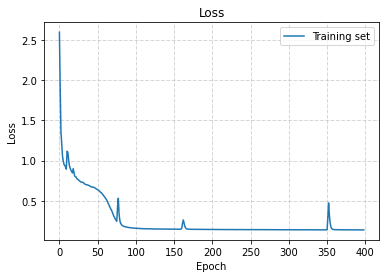

In [24]:
#vis stuff
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()
render_training_history(history)

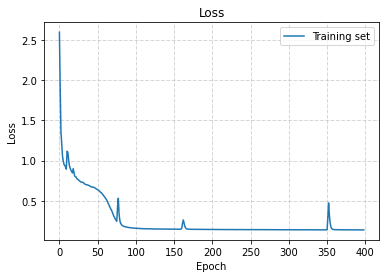

In [25]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()
render_training_history(history)

In [26]:
tf.train.latest_checkpoint(checkpoint_dir)

model.save("baselineModel.h5")

vocab_size=VOCABULARY_SIZE
embedding_dim=256
rnn_units=1024

simplified_batch_size = 1
model_simplified = build_model(vocab_size, embedding_dim, rnn_units, simplified_batch_size)
model_simplified.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model_simplified.build(tf.TensorShape([simplified_batch_size, None]))
model_simplified.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (1, None, 256)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (1, None, 1024)           5246976   
_________________________________________________________________
dense_1 (Dense)              (1, None, 17)             17425     
Total params: 5,268,753
Trainable params: 5,268,753
Non-trainable params: 0
_________________________________________________________________


In [27]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)
    
    padded_start_string = start_string
    # Converting our start string to numbers (vectorizing).
    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))
    # Empty string to store our results.
    text_generated = []
    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)
        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()
        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)
        
        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]
        text_generated.append(next_character)
        
       # output = ''.join(text_generated)
        
       # output = decodeWorkout(output)
        
    return (padded_start_string + ''.join(text_generated))

In [28]:
print((generate_text(model_simplified, '1-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified
print(decodeWorkout(generate_text(model_simplified, '1-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

1-DL:~13~75~0~8~40~3~10~55~7~11~75~2~␣
1-DL:
9 pushups for 50 seconds with 2 second rest 
3 situps for 20 seconds with 34 second rest 
5 squats for 30 seconds with 34 second rest 
14 burpees for 70 seconds with 4 second rest 


In [29]:
def generate_combos(model):
    temps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    DL = ["1-DL:","2-DL:","3-DL:","4-DL:","5-DL:"]
    for dl in DL:
        print(f"--------DL: {dl}--------")
        for temp in temps:
            print(f"--------TEMP: {temp}--------")
            print("TEMP: " + dl )
            outputStr = generate_text(model, dl, num_generate = maxLength, temperature = temp)
            print(outputStr)
            print("BELOW IS WHAT IT DECODES")
            print(decodeWorkout(outputStr))
        
    

In [30]:
generate_combos(model_simplified)

--------DL: 1-DL:--------
--------TEMP: 0.1--------
TEMP: 1-DL:
1-DL:~10~70~6~11~60~14~13~65~7~9~55~20~␣
BELOW IS WHAT IT DECODES
1-DL:
10 pushups for 70 seconds with 6 second rest 
11 situps for 60 seconds with 14 second rest 
13 squats for 65 seconds with 7 second rest 
9 burpees for 55 seconds with 20 second rest 
--------TEMP: 0.2--------
TEMP: 1-DL:
1-DL:~10~70~1~10~50~21~4~30~1~8~40~14~␣
BELOW IS WHAT IT DECODES
1-DL:
10 pushups for 70 seconds with 1 second rest 
10 situps for 50 seconds with 21 second rest 
4 squats for 30 seconds with 1 second rest 
8 burpees for 40 seconds with 14 second rest 
--------TEMP: 0.3--------
TEMP: 1-DL:
1-DL:~10~70~6~11~60~14~13~65~7~9~55~20~␣
BELOW IS WHAT IT DECODES
1-DL:
10 pushups for 70 seconds with 6 second rest 
11 situps for 60 seconds with 14 second rest 
13 squats for 65 seconds with 7 second rest 
9 burpees for 55 seconds with 20 second rest 
--------TEMP: 0.4--------
TEMP: 1-DL:
1-DL:~4~20~19~6~40~13~9~55~15~9~45~12~␣
BELOW IS WHAT IT DE

In [31]:
print(decodeWorkout(generate_text(model_simplified, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

fail


In [32]:
print(decodeWorkout(generate_text(model_simplified, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

fail


In [33]:
print(decodeWorkout(generate_text(model_simplified, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

fail


In [34]:
print(model_simplified.outputs)
print(model_simplified.inputs)

[<KerasTensor: shape=(1, None, 17) dtype=float32 (created by layer 'dense_1')>]
[<KerasTensor: shape=(1, None) dtype=float32 (created by layer 'embedding_2_input')>]


In [35]:
model_simplified.save("simplified_model.h5")
model_simplified.save("simplified_model.savedmodel")


2022-04-23 20:49:32.057752: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [36]:
newModel = keras.models.load_model('simplified_model.h5')
print(decodeWorkout(generate_text(newModel, '5-DL:', num_generate = maxLength, temperature=1.0))) #make sure you pass it model_simplified

fail
